##  데이터 정제
- 현장에서 만들어진 데이터는 오류를 포함하고 있기 때문에 분석하기 전에 수정이 필요
1. 결측치 (빠진 데이터)
2. 이상치 (이상한 데이터)

## 7-1 결측치(빠진 데이터 찾아 정제)

## Lab 1 : 결측치 찾기
- 결측치 만들기
- 결측치 확인하기


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
# 결측치가 들어있는 데이터 프레임 만들기
# NaN : Not a Number 숫자 형태의 누락된 데이터
df = pd.DataFrame( {'sex' : ['M', 'F', np.nan, 'M', 'F'],
                   'score' : [5, 4, 3, 4, np.nan]} )
                
df

In [ ]:
# NaN 값으로 연산된 결과 값도 NaN
df['score'] + 1

In [ ]:
# 결측치 확인하기
# na : Not Avaiable
pd.isna(df)

In [ ]:
# 결측치 개수
pd.isna(df).sum()

In [ ]:
# 컬럼(변수) score의 결측치 개수
pd.isna(df)['score'].sum()

## Lab 2 : 결측치 제거
- 결측치 있는 행 제거하기
- 여러 변수(컬럼)에 결츠치 없는 데이터 추출하기
- 결측치가 하난라도 있으면 제거하기

In [ ]:
df

In [ ]:
# score 변수에서 결측치가 있는 행을 제거
df.dropna(subset = ['score'])

In [ ]:
# 앞의 연산 결과가 df에는 반여디지 않았음을 확인 
df

In [ ]:
df_nomiss = df.dropna(subset = ['score'])
df_nomiss

In [ ]:
df_nomiss['score'] + 1

In [ ]:
# 변수 sex, score의 결측치 제거하기
df_nomiss = df.dropna(subset= ['sex', 'score'])
df_nomiss

In [ ]:
df

In [ ]:
# 결측치가 하나라도 있으면 모두 제거하기
df_nomiss2 = df.dropna()
df_nomiss2

### 생각해 보기 - 결측치를 모두 제거해 버리면 ??
1. 분석에 필요한 행까지 모두 제거될 수 있음
2. 예를 들어, (성별, 소득, 지역) 세 변수로 구성된 데이터에서 '성별에 따른 소득 격차'를 알아보는 경우,  지역의 결측치를 제거할 필요가 없음

## Lab 3 : 결측치 제거하기
1. 평균 값으로 대체하기
- exam.csv 파일 불러우기
- exam 데이터에서 math의 일부 데이터를 결측치(np.nan)로 대체하기
- exam의 결측치를 math의 평균 값을 구하여 평균값으로 대체하기

In [ ]:
exam = pd.read_csv('exam.csv')

In [ ]:
# 인덱스 값 2, 7, 14에 해당 하는 행의 math 컬럼 값을 NaN 값으로 변경
exam.loc[[2, 7, 14], ['math']] = np.nan
exam

In [ ]:
# math 평균값 구하기
exam['math'].mean()

In [ ]:
# 결측치 값을 평균값 대체하기
exam['math'] = exam['math'].fillna(55)

In [ ]:
exam

In [ ]:
# 결측치 확인
exam['math'].isna().sum()

## Lab 4 : 혼자서 해보기 (mpg 데이터 분석)
- mpg 데이터에 결측치를 만들고, 데이터를 분석해 보기
- 인데스 값 [64, 123, 130, 152, 211]의 고속도록 연비(hwy) 값을 결측치로 만들기

In [ ]:
mpg = pd.read_csv('mpg.csv')

In [ ]:
# 인데스 값 [64, 123, 130, 152, 211]의 고속도록 연비(hwy) 값을 결측치로 만들기
mpg.loc[[64, 123, 130, 152, 211], 'hwy'] = np.nan

In [ ]:
# 인데스 값 [64, 65]의 데이터를 출력해서 NaN 값 확인
mpg.iloc[64:66]

> Q1 : 구동 방식(drv)별로 고속도로 연비(hwy) 평균일 비교하려고함
- drv와 hwy 변수에 결측치가 몇개 있는지 확인하기

In [ ]:
# 변수 drv, hwy 값에 결측치가 몇개인지 확인
mpg[['drv', 'hwy']].isna().sum()

> Q2 : df.dropna()를 이용하여 hwy 변수의 결측치를 제거하고, 어떤 구동 방식의 hwy 평균 연비가 높은지 알아보시오. 하나의 pandas 구문으로 작성해 보시오

In [ ]:
# 변수 hwy 값에 결측치가 몇개인지 확인
mpg.dropna(subset= ['hwy']).isna().sum()

In [ ]:
# 변수 hwy 변수 값에 결측치를 제거하고, 어떤 구동 방식(drv)의 hwy 평균 연비가 높은지 알아보기

## mpg.dropna(subset= ['    ']).groupby('     ').agg(mean_hwy = ('       ', '       '))

## Lab 5 :  이상치 정제하기 (이상한 데이터 찾아 정제)
- 이상치 : 정상 범위에서 크게 벋어난 값
- (예) 몸무게 230kg

- 이상 값을 제거하고 성별 score 평균 구하기
    1. 이상치를 갖는 데이터 만들기
    1. 이상치 확인하기
    1. 결측 처리하기
    1. 성별 score 평균 구하기

In [ ]:
# 이상치를 갖는 데이터 만들기
# sex (남자 - 1, 여자 - 2)
# score (1점 ~ 5점) 5점 척도로 분류
# 이상치 : sex - 3, score - 6
df = pd.DataFrame( {'sex'  : [1, 2, 1, 3, 2, 1],
                    'score' :[5, 4, 3, 4, 2, 6]
                   })
df

In [ ]:
# 이상치 확인하기
# sex 값의  집단별 빈도수 확인 - 3값이 존재
df['sex'].value_counts().sort_index()

In [ ]:
# 이상치 확인하기
# score 값의  집단별 빈도수 확인 - 6값이 존재
df['score'].value_counts().sort_index() 

In [ ]:
# 이상 값을 찾아 결측치 부여
df['sex'] = np.where(df['sex'] == 3, np.nan, df['sex'])
df

In [ ]:
# 이상 값을 찾아 결측치 부여
df['score'] = np.where(df['score'] > 5, np.nan, df['score'])
df

In [ ]:
df.dropna(subset = ['sex', 'score']) \
    .groupby('sex')\
    .agg(mean_score = ('score', 'mean'))

## Lab 6 : 이상치 제거하기 - 극단적인 값
- 값의 정상범위를 정하고, 정상 범위를 벋어난 값을 제거하기
- 값의 정상 범위를 정할 때 통계적 기준을 적용할 수 있음
    1. 상자(수염) 그림으로 극단치 기준 정하기

#### 1. 상자 그림 살펴보기
| 상자 그림        |    값           |     설명                     |
| ---              | ----            | ------                       |
| 상자 아래 세로선 | 아랫 수염       | 하위 0 ~ 25% 내 해당하는 값  |
| 상자 밑면        | 1사분위수(Q1)   | 하위 0 ~ 25% 내 해당하는 값  |
| 상자 내 굵은 선  | 2사분위수(Q2)   | 하위 50% 내 해당하는 값  |
| 상자 윗면        | 3사분위수(Q3)   | 하위 75% 내 해당하는 값  |
| 상자 위 세로선   | 윗 수염         | 하위 75 ~ 100% 내 해당하는 값  |
| 상자 밖 가로선   | 극단치 경계     | Q1, Q3 밖 1.5 IQR 내 최대값  |
| 상자 밖 점 표식  | 극단치          | Q1, Q3 밖 1.5 IQR 을 벋어난 값  |

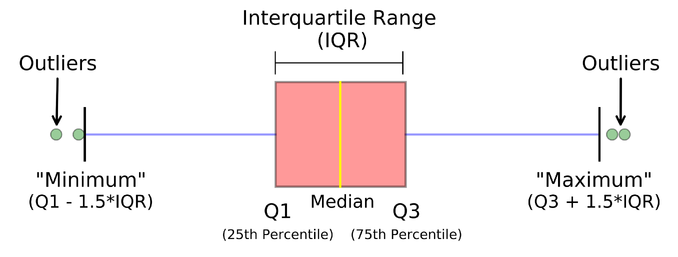

In [ ]:
mpg = pd.read_csv('mpg.csv')

In [ ]:
import seaborn as sns

In [ ]:
sns.boxplot(data = mpg, y = 'hwy')

#### 2. 극단치 기준값 구하기

> 1사분위수, 3사분위수 구하기

In [ ]:
pct25 = mpg['hwy'].quantile(.25)
pct25

In [ ]:
pct75 = mpg['hwy'].quantile(.75)
pct75

> IQR 구하기

In [ ]:
iqr = pct75 - pct25
iqr

> 하한, 상한 구하기

In [ ]:
pct25 - 1.5 * iqr

In [ ]:
pct75 + 1.5 * iqr

#### 3. 극단치를 결측 처리하기
- hwy 값이 4.5 ~ 40.5를 벋어나면 결측치 처리
- (pct25 - 1.5 * iqr) ~ (pct75 + 1.5 * iqr)

In [ ]:
# 극단치를 결측 처리함
# 주의 : np.where()의 각 조건을 괄호로 감싸주어야 함
mpg['hwy'] = np.where( (mpg['hwy'] < 4.5) | (mpg['hwy'] > 40.5),
                        np.nan, mpg['hwy']
                     )

In [ ]:
# 결측 처리된 값의 수 확인
mpg['hwy'].isna().sum()

#### 4. 결측치를 제외하고 데이터 분석
- 구동방식(drv)에 따라 고속도로 연비(hwy)가 어떻게 달라지는지 확인

In [ ]:
mpg.dropna(subset = ['hwy']) \
   .groupby('drv') \
   .agg(mean_hwy = ('hwy', 'mean'))

## Lab 7 : 혼자서 해보기
1. mpg 데이터에서 구동방식(drv)별 도시 연비(cty)를 분석해 봅시다.
1. mpg 데이터에 이상값과 극단값을 할당합니다.

- (drv 이상치 할당) mpg.loc[[9, 13, 57, 92], 'drv'] = 'k'
- (cty 이상치 할당) mpg.loc[[28, 42, 128, 202], 'cty'] = [3, 4, 39, 42]


> mpg 데이터에 이상치 할당

In [ ]:
mpg = pd.read_csv('mpg.csv')

In [ ]:
# drv에는 4(사륜), f(전륜), r(후륜)의 값만 존재함
#  k는 허용하지 않는 이상치
# [9, 13, 57, 92]행의 drv 값을 k로 할당
mpg.loc[[9, 13, 57, 92], 'drv'] = 'k'

In [ ]:
# [28, 42, 128, 202]행의 도시 연비 값을 각각  [3, 4, 39, 42]로 할당
# 도시 연비 값 [3, 4, 39, 42]은 (pct25 - 1.5 * iqr) ~ (pct75 + 1.5 * iqr)  범위 밖의 이상값
mpg.loc[[28, 42, 128, 202], 'cty'] = [3, 4, 39, 42]

Q1 : drv에 이상치가 있는지 확인

In [ ]:
# k 값이 4개 존재하는 것을 확인
mpg['drv'].value_counts()

In [ ]:
# drv 이상 값 k에 대해 NaN 처리 
mpg['drv'] = np.where(mpg['drv'].isin(['4', 'f', 'r']), mpg['drv'], np.nan)

In [ ]:
# drv 변수에 이상 값(NaN)이 몇개인지 확인

mpg['drv'].isna().sum()

In [ ]:
# drv에 따른 자동차 빈도 수 구하기
mpg['drv'].value_counts()

> Q2 : 상자 그림으로 cty에 이상치가 있는지 확인
- (pct25 - 1.5 * iqr) ~ (pct75 + 1.5 * iqr) 범위 밖에 극단 값이 있는지 확인

In [ ]:
# 도시연비 cty에 이상치가 있는지 확인하기 위해 박스 수염 그래프 그리기
# (pct25 - 1.5 * iqr) ~ (pct75 + 1.5 * iqr) 범위 밖에 극단 값이 있음을 확인
sns.boxplot(data=mpg, y='cty')

In [ ]:
# 25% 값 구하기
pct25 = mpg['cty'].quantile(0.25)
pct25

In [ ]:
# 75% 값 구하기
pct75 = mpg['cty'].quantile(0.75)
pct75

In [ ]:
# irq 값 구하기
iqr = pct75 - pct25
iqr

In [ ]:
pct25 - 1.5 * iqr

In [ ]:
pct75 + 1.5 * iqr

In [ ]:
# (pct25 - 1.5 * iqr) ~ (pct75 + 1.5 * iqr) 범위 밖에 극단 값인 경우 NaN 처리
mpg['cty'] = np.where( (mpg['cty'] < 6.5) | (mpg['cty'] > 26.5),
                        np.nan, mpg['cty'])

In [ ]:
# 도시연비 cty에 대해 박스 수염 그래프 그리기
sns.boxplot(data=mpg, y='cty')

> Q3 : 구동방식(drv)별로 도시연비(cty) 평균이 어떻게 다른지 확인하기 

In [ ]:
# 구동방식(drv)과 도시연비(cty)의 이상 값을 제거하고
# 구동방식(drv)별로 도시연비(cty) 평균이 어떻게 다른지 확인하기

## mpg.dropna(subset = ['drv', 'cty']) \
##   .groupby('     ')\
##   .agg(mean_cty = ('     ', '     '))